<a href="https://colab.research.google.com/github/hamza3laa/Clustering-/blob/main/s03a_unsupervised_clustering_kmeans_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning | Clustering (K-Means) | Case-study

## Bank Customer / Marketing Segmentation [Clustering (K-Means)]

### Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading & Inspecting Data

In [6]:
# Load the data & check what's inside
df = pd.read_csv ('/content/drive/MyDrive/Copy of bank-customers.csv')
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploring Data

In [7]:
num_df = df[df.describe().columns]
cat_df = df[['job' ,'marital' , 'education','default' , 'housing' , 'loan' , 'contact','month'	,'day_of_week' ,'poutcome']]
print (num_df.columns , cat_df.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object') Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [8]:
round(df.describe() , 2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


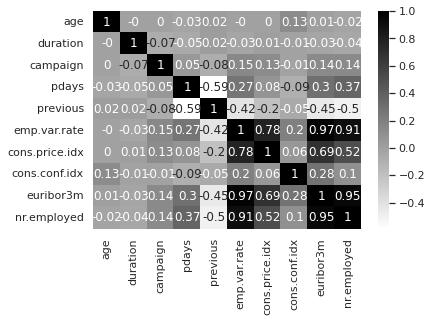

In [9]:
sns.heatmap(round(num_df.corr() , 2) , annot= round(num_df.corr() , 2) ,cmap ='gray_r');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


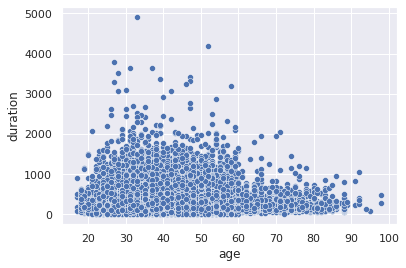

In [17]:
sns.scatterplot(df['age'] ,df['duration']);

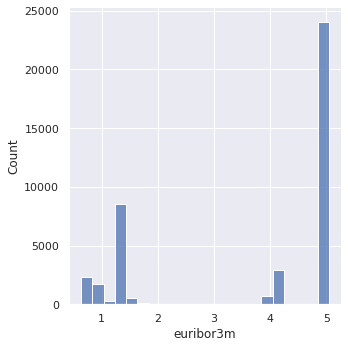

In [30]:
sns.displot(df['euribor3m'] ,kind='hist');

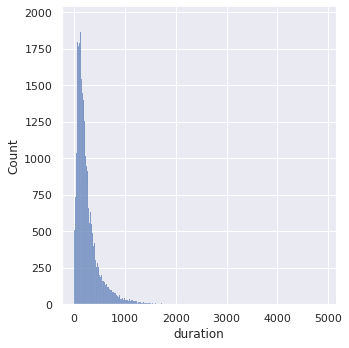

In [15]:
sns.displot(df['duration'] ,kind='hist');
plt.plot(df['duration'])

### Data Preprocessing

In [40]:
import scipy.stats as stat
import pylab


In [55]:
def plot_data(df,feature):
    plt.subplot(1,2,1)
    sns.kdeplot(df[feature])
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

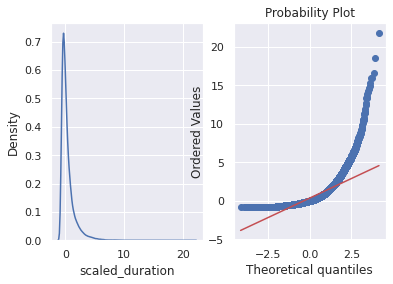

In [116]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler().fit_transform(df[['duration']])
df['scaled_duration']=sc
plot_data(df,'scaled_duration')

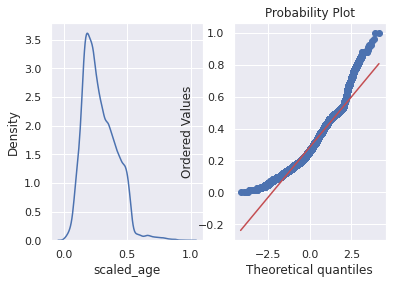

In [81]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit_transform(df[['age']])
df['scaled_age']=sc
plot_data(df,'scaled_age')

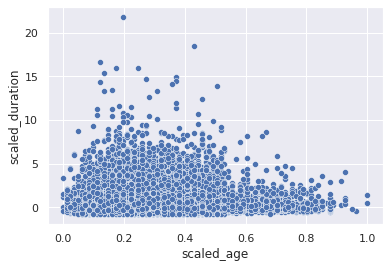

In [117]:
sns.scatterplot(data=df ,x=df['scaled_age'] , y=df['scaled_duration'])

In [118]:
X = df[['scaled_age','scaled_duration']].values

### Finding the Optimal Number of Clusters (Elbow / Knee Method)

In [119]:
from sklearn.cluster import KMeans 
wssc = []
for i in range(2,10):
  model = KMeans(n_clusters=i , init='k-means++' , random_state=42)
  model.fit_predict(X)
  wssc.append(model.inertia_)

In [120]:
wssc

[23556.543185979317,
 13358.20694070387,
 8800.584147729289,
 6375.432522040671,
 4762.844283833758,
 3783.1963351942113,
 3069.0275185405535,
 2587.4141249680333]

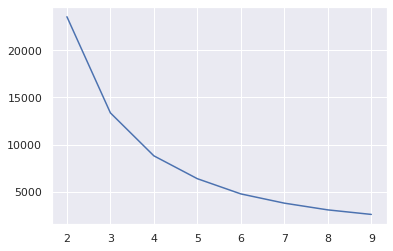

In [121]:
plt.plot(range(2,10), wssc)

### Model Training & Prediction

In [122]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
model.fit_predict(X)

array([2, 0, 2, ..., 0, 4, 2], dtype=int32)

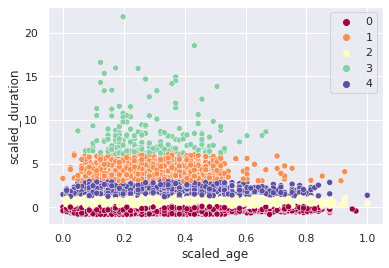

In [125]:
sns.scatterplot(data=df ,x=df['scaled_age'] , y=df['scaled_duration'] , hue=model.labels_ ,palette='Spectral')


==========